In [50]:
# ! pip install pandas-profiling > /dev/null
# from pandas_profiling import ProfileReport

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [52]:
data = pd.read_csv('/content/drive/MyDrive/Data Scientist/Machine learning/Task#1 dataset/bikes.csv')
data.head()

<ipython-input-52-eb1864f6b757>:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/Data Scientist/Machine learning/Task#1 dataset/bikes.csv')


,Brand,Model,Year,Category,Rating,Displacement (ccm),Power (hp),Torque (Nm),Engine cylinder,Engine stroke,...,Dry weight (kg),Wheelbase (mm),Seat height (mm),Front brakes,Rear brakes,Front tire,Rear tire,Front suspension,Rear suspension,Color options
0,acabion,da vinci 650-vi,2011,Prototype / concept model,3.2,NaN,804.0,NaN,Electric,Electric,...,420.0,NaN,NaN,Single disc,Single disc,NaN,NaN,NaN,NaN,NaN
1,acabion,gtbo 55,2007,Sport,2.6,1300.0,541.0,420.0,In-line four,four-stroke,...,360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,acabion,gtbo 600 daytona-vi,2011,Prototype / concept model,3.5,NaN,536.0,NaN,Electric,Electric,...,420.0,NaN,NaN,Single disc,Single disc,NaN,NaN,NaN,NaN,NaN
3,acabion,gtbo 600 daytona-vi,2021,Prototype / concept model,NaN,NaN,536.0,NaN,Electric,Electric,...,420.0,NaN,NaN,Single disc,Single disc,NaN,NaN,NaN,NaN,NaN
4,acabion,gtbo 70,2007,Prototype / concept model,3.1,1300.0,689.0,490.0,In-line four,four-stroke,...,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Custom made.


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38472 entries, 0 to 38471
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                38472 non-null  object 
 1   Model                38444 non-null  object 
 2   Year                 38472 non-null  int64  
 3   Category             38472 non-null  object 
 4   Rating               21788 non-null  float64
 5   Displacement (ccm)   37461 non-null  float64
 6   Power (hp)           26110 non-null  float64
 7   Torque (Nm)          16634 non-null  float64
 8   Engine cylinder      38461 non-null  object 
 9   Engine stroke        38461 non-null  object 
 10  Gearbox              32675 non-null  object 
 11  Bore (mm)            28689 non-null  float64
 12  Stroke (mm)          28689 non-null  object 
 13  Fuel capacity (lts)  31704 non-null  float64
 14  Fuel system          27844 non-null  object 
 15  Fuel control         22008 non-null 

# Data Cleaning

### Delete coulmns with hight percentage of null value

In [54]:
print('=== Percentage of null values per variable ===')
for cat in data:
    len_cat = len(data[cat])
    print(f'{cat}: {np.round(data[cat].isnull().sum()/len_cat,3)}')

=== Percentage of null values per variable ===
Brand: 0.0
Model: 0.001
Year: 0.0
Category: 0.0
Rating: 0.434
Displacement (ccm): 0.026
Power (hp): 0.321
Torque (Nm): 0.568
Engine cylinder: 0.0
Engine stroke: 0.0
Gearbox: 0.151
Bore (mm): 0.254
Stroke (mm): 0.254
Fuel capacity (lts): 0.176
Fuel system: 0.276
Fuel control: 0.428
Cooling system: 0.11
Transmission type: 0.146
Dry weight (kg): 0.416
Wheelbase (mm): 0.337
Seat height (mm): 0.371
Front brakes: 0.041
Rear brakes: 0.046
Front tire: 0.169
Rear tire: 0.168
Front suspension: 0.321
Rear suspension: 0.334
Color options: 0.368


### 1. Identify Columns That Contain a Single Value


As we can see from the below information, we do not have any singel value virables in our dataset.

In [55]:
data.nunique()

Brand                    576
Model                  17731
Year                     129
Category                  18
Rating                    33
Displacement (ccm)      1320
Power (hp)               716
Torque (Nm)              723
Engine cylinder           21
Engine stroke              9
Gearbox                   16
Bore (mm)                289
Stroke (mm)              540
Fuel capacity (lts)      443
Fuel system             2910
Fuel control              14
Cooling system             3
Transmission type          3
Dry weight (kg)         1279
Wheelbase (mm)           673
Seat height (mm)         379
Front brakes            2040
Rear brakes             1508
Front tire              1191
Rear tire               1391
Front suspension        4316
Rear suspension         4653
Color options           9324
dtype: int64

# Drop unnecessary features


I droped some features based on below factors:
- high cardinality
- having lot of null values
- unrelated to the problem that I am trying to solve


In [56]:
data.drop(['Fuel control', 'Rating', 'Rear suspension',
           'Front suspension', 'Seat height (mm)', 'Wheelbase (mm)',
           'Torque (Nm)', 'Power (hp)', 'Color options', 'Model', 'Brand',
           'Year', 'Front tire', 'Rear tire', 'Front brakes', 'Rear brakes',
           'Stroke (mm)','Bore (mm)', 'Displacement (ccm)'
            ], axis='columns', inplace=True)

# Categorical variables

in below categorical variables, we can replace null valaues with "unknown".
they are important for our problem, I explained why they are important in the
documentation.

In [57]:
data[['Fuel system', 'Transmission type', 'Cooling system',
      'Engine cylinder', 'Engine stroke']] \
    = data[['Fuel system', 'Transmission type', 'Cooling system',
            'Engine cylinder', 'Engine stroke']].fillna(value='Unknown')

in below cell, i grouped those rows that are in a same  group but have different names. It also can be helpful to reduce high cardinality problem.

In [58]:
replacement_values = {
    'Fuel system': {'Injection': 'Injection',
                    'Carburettor': 'Carburettor', 'Turbo': 'Turbo'},
    'Category': {'Sport': 'Sport', 'Prototype / concept model': 'Standard',
                'ATV': 'Racing', 'Scooter': 'Standard', 'Naked bike': 'Standard',
                'Custom / cruiser': 'Standard', 'Allround': 'Allround',
                'Cross / motocross': 'Offroad', 'Super motard': 'Racing',
                'Minibike, sport': 'Sport', 'Minibike, cross': 'Racing',
                'Classic': 'Standard', 'Touring': 'Touring', 'Speedway': 'Racing',
                'Enduro / offroad': 'Offroad', 'Trial': 'Sport',
                'Unspecified category': 'Other', 'Sport touring': 'Touring'}
}

def apply_replacement(value, criteria):
    for key, replacement in criteria.items():
        if key in str(value):
            return replacement
    return value

for column, criteria in replacement_values.items():
    data[column] = data[column].apply(lambda x: apply_replacement(x, criteria))

### Gearbox

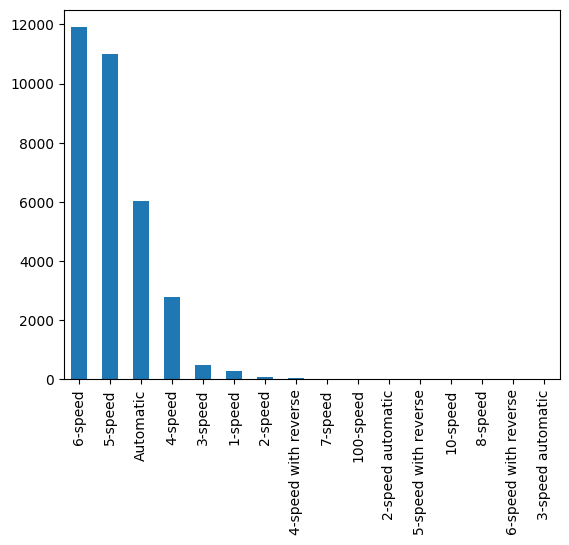

In [59]:
data.dropna(subset=['Gearbox'], inplace=True)
data['Gearbox'].value_counts().plot(kind='bar');

### Transmission type

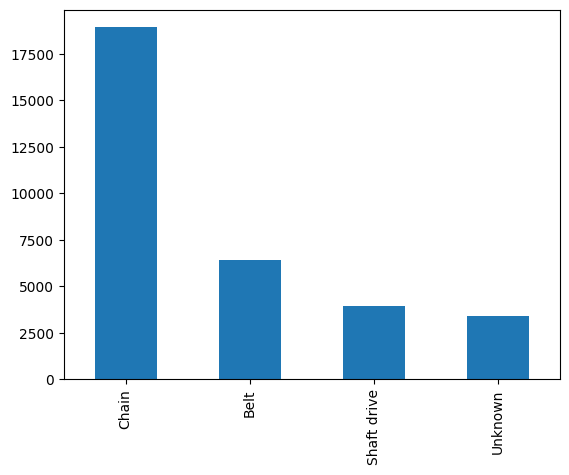

In [60]:
data['Transmission type'].value_counts().plot(kind='bar');

### Cooling system

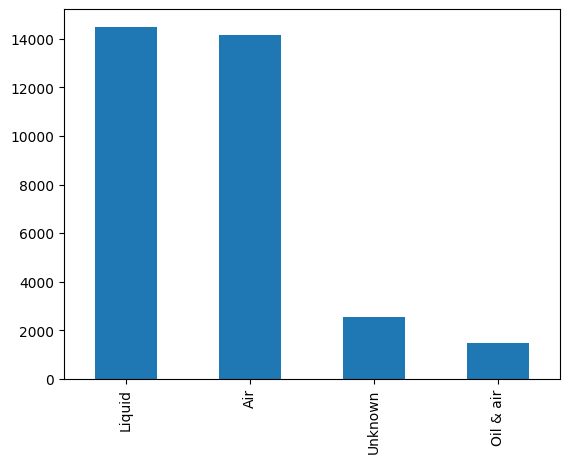

In [61]:
data['Cooling system'].value_counts().plot(kind='bar');

### Fuel system

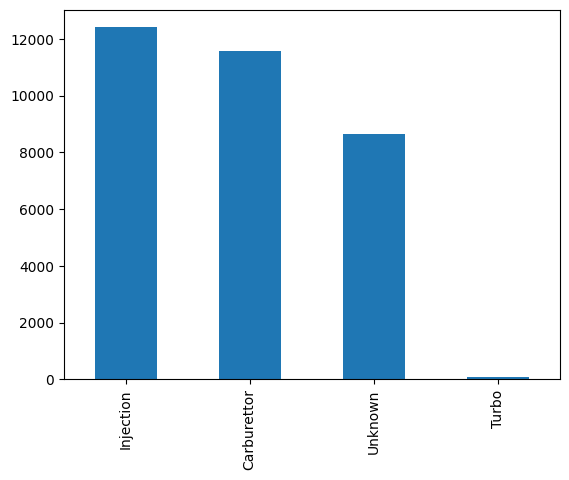

In [62]:
data['Fuel system'].value_counts().plot(kind='bar');

### Engine cylinder

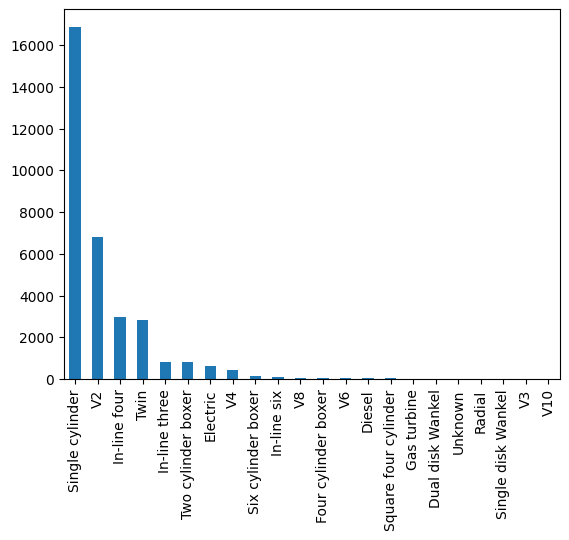

In [63]:
data['Engine cylinder'].value_counts().plot(kind='bar');

### Engine stroke

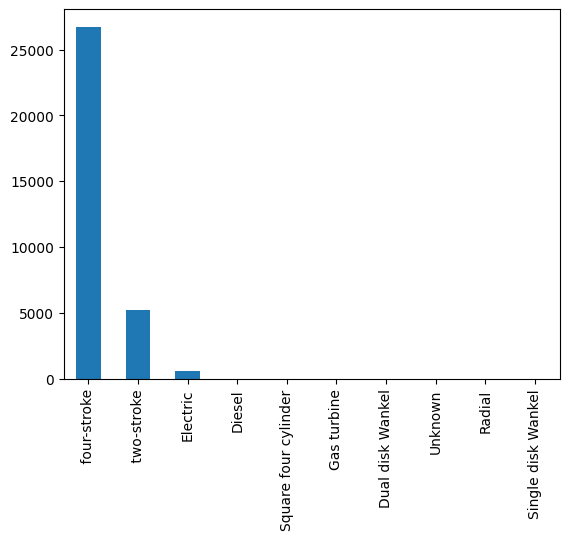

In [64]:
data['Engine stroke'].value_counts().plot(kind='bar');

# Numerical variables

in my problem, Dry weight (kg) is an important factor. so i need to handle its null values. in our case, we can replace null values by mean of their coresponding category.

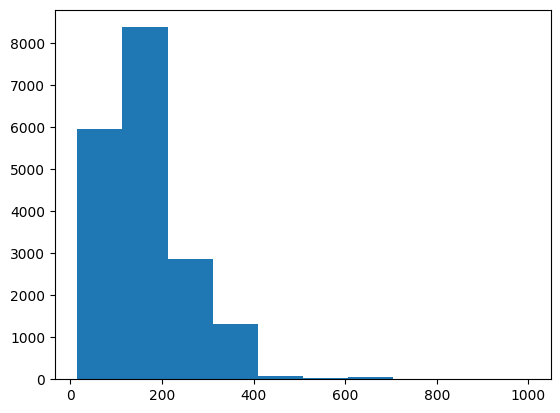

In [65]:
plt.hist(data['Dry weight (kg)'], bins=10);

In [66]:
category_means = data.groupby('Category')['Dry weight (kg)'].mean()

def fill_missing_values(row):
    if pd.isnull(row['Dry weight (kg)']):
        return category_means[row['Category']]
    else:
        return row['Dry weight (kg)']

data['Dry weight (kg)'] = data.apply(fill_missing_values, axis=1)

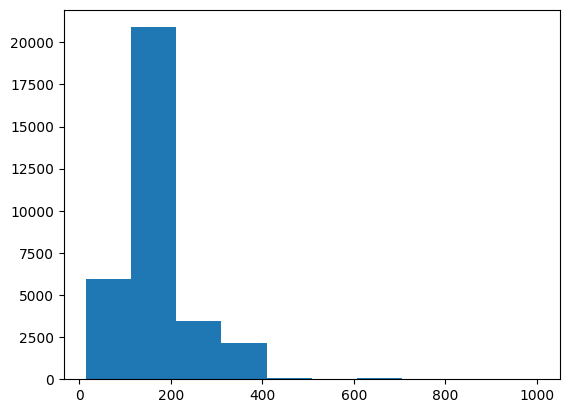

In [67]:
plt.hist(data['Dry weight (kg)'], bins=10);

### Fuel capacity (lts)

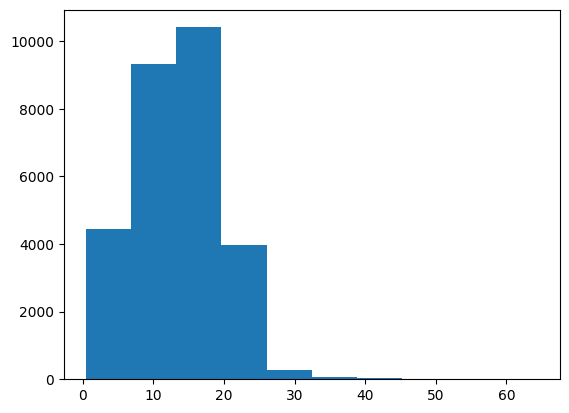

In [68]:
plt.hist(data['Fuel capacity (lts)']);
# it seems that this variable has a reletively normal distribution.

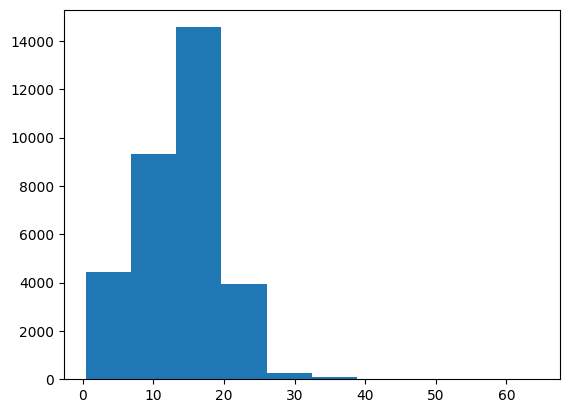

In [69]:
data['Fuel capacity (lts)'].fillna(value=data['Fuel capacity (lts)'].mean(), inplace=True)
plt.hist(data['Fuel capacity (lts)']);

# we can see that after replacing null values by mean the distribution does not
# changed too much.

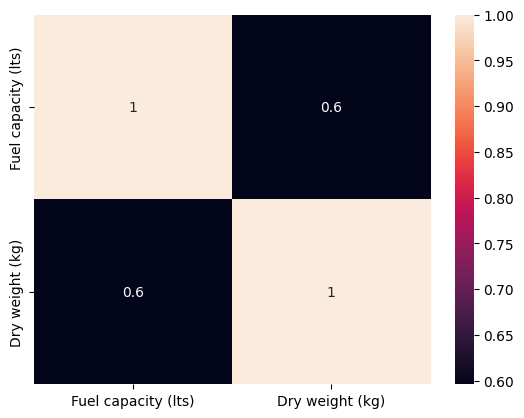

In [70]:
corr = data[['Fuel capacity (lts)', 'Dry weight (kg)']].corr();
sns.heatmap(corr, annot=True);

# again, we can see that there is strong positive relationship between our
# selected numerical values.

In [71]:
print('=== Number of null values per variable ===')
for cat in data:
    len_cat = len(data[cat])
    print(f'{cat}: {data[cat].isnull().sum()}')

# everything is alright!!!

=== Number of null values per variable ===
Category: 0
Engine cylinder: 0
Engine stroke: 0
Gearbox: 0
Fuel capacity (lts): 0
Fuel system: 0
Cooling system: 0
Transmission type: 0
Dry weight (kg): 0


In [72]:
numerical_columns = data.select_dtypes(include=['float64']).columns
variances_numerical = data[numerical_columns].var()

print("Variances of Numerical Columns:")
print(variances_numerical)

Variances of Numerical Columns:
Fuel capacity (lts)      32.042321
Dry weight (kg)        5179.778034
dtype: float64


# Let's do Clustering!!!

In [73]:
# convert categorical features to one-hot format and combine them with
# numerical ones

categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove('Category')
numerical_columns = data.select_dtypes(include=['float64']).columns.tolist()

one_hot_encoded = pd.get_dummies(data[categorical_columns],
                                 columns=categorical_columns)

combined_data = pd.concat([data[numerical_columns], one_hot_encoded], axis=1)

In [74]:
# PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(combined_data)
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])

In [75]:
# clustring by k-means

num_clusters = 3    # this number is selected by practice
kmeans = KMeans(n_clusters=num_clusters, random_state=42, max_iter=200)
cluster_labels = kmeans.fit_predict(pca_result)

pca_df['cluster'] = cluster_labels
combined_data['cluster'] = cluster_labels
data['cluster'] = cluster_labels

# silhouette score
silhouette_avg = silhouette_score(pca_result, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.64


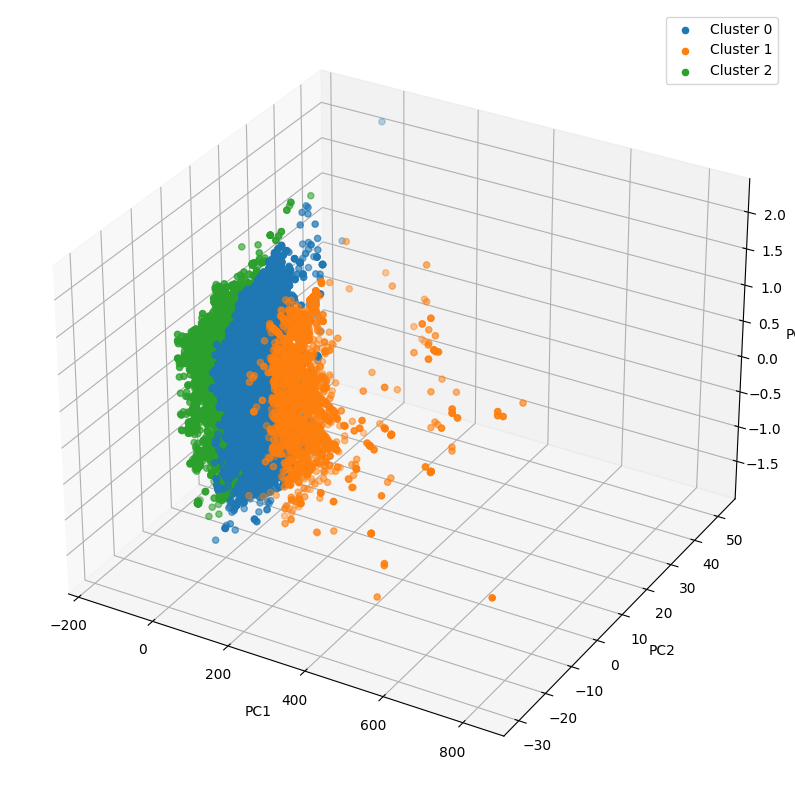

In [76]:
fig = plt.figure(figsize=(10, 15))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(num_clusters):
    cluster_data = pca_df[pca_df['cluster'] == cluster]
    ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'], label=f'Cluster {cluster}')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()

# Note:  Uncomment below cell if you want to get animation of the clustring plot!

In [77]:
# fig = plt.figure(figsize=(10, 15))
# ax = fig.add_subplot(111, projection='3d')

# for cluster in range(num_clusters):
#     cluster_data = pca_df[pca_df['cluster'] == cluster]
#     ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'], label=f'Cluster {cluster}')

# ax.set_xlabel('PC1')
# ax.set_ylabel('PC2')
# ax.set_zlabel('PC3')
# ax.legend()

# def update(frame):
#     ax.view_init(elev=30, azim=frame)

# ani = FuncAnimation(fig, update, frames=range(300, 200, -5), repeat=True)
# ani.save('cluster_rotation.gif', writer='imagemagick')

In [78]:
kmeans_final = pd.concat([combined_data, data[categorical_columns], data['Category']], axis=1)

In [79]:
cluster_name_mapping = {
    0: 'Good Fuel Efficiency',
    1: 'Moderate Fuel Efficiency',
    2: 'Excellent Fuel Efficiency'
}

kmeans_final['cluster'] = kmeans_final['cluster'].replace(cluster_name_mapping)
data['cluster'] = data['cluster'].replace(cluster_name_mapping)

In [80]:
cluster_centers = kmeans.cluster_centers_
for i in range(num_clusters):
    cluster_data = pca_result[cluster_labels == i]
    variance = np.sum((cluster_data - cluster_centers[i]) ** 2)
    print(f"Cluster {cluster_name_mapping[i]}: Variance = {variance:.2f}")

Cluster Good Fuel Efficiency: Variance = 10394495.65
Cluster Moderate Fuel Efficiency: Variance = 14989833.05
Cluster Excellent Fuel Efficiency: Variance = 5543812.62


In [81]:
category_counts_by_cluster = kmeans_final.groupby(['cluster', 'Category']).size()
category_counts_by_cluster.unstack(fill_value=0)

Category,Allround,Offroad,Other,Racing,Sport,Standard,Touring
cluster,,,,,,,
Excellent Fuel Efficiency,523,4492,8,1069,1247,3474,15
Good Fuel Efficiency,1639,463,756,1650,4851,8933,128
Moderate Fuel Efficiency,22,7,40,457,109,1403,1389


In [82]:
cat_Fuel_means = kmeans_final.groupby('cluster')['Fuel capacity (lts)'].mean()
cat_Fuel_means_df = pd.DataFrame(cat_Fuel_means)
cat_Fuel_means_sorted_df = cat_Fuel_means_df.sort_values(by='Fuel capacity (lts)'
                                                        , ascending=False)

cat_dry_means = kmeans_final.groupby('cluster')['Dry weight (kg)'].mean()
cat_dry_means_df = pd.DataFrame(cat_dry_means)
cat_dry_means_sorted_df = cat_dry_means_df.sort_values(by='Dry weight (kg)',
                                                       ascending=False)

pd.concat([cat_Fuel_means_sorted_df, cat_dry_means_sorted_df], axis=1)

,Fuel capacity (lts),Dry weight (kg)
cluster,,
Moderate Fuel Efficiency,19.372158,331.993913
Good Fuel Efficiency,14.891920,179.142056
Excellent Fuel Efficiency,9.099857,103.729770


In [83]:
cat_Fuel_means = kmeans_final.groupby('Category')['Fuel capacity (lts)'].mean()
cat_Fuel_means_df = pd.DataFrame(cat_Fuel_means)
cat_Fuel_means_sorted_df = cat_Fuel_means_df.sort_values(by='Fuel capacity (lts)'
                                                        , ascending=False)

cat_dry_means = kmeans_final.groupby('Category')['Dry weight (kg)'].mean()
cat_dry_means_df = pd.DataFrame(cat_dry_means)
cat_dry_means_sorted_df = cat_dry_means_df.sort_values(by='Dry weight (kg)',
                                                       ascending=False)

pd.concat([cat_Fuel_means_sorted_df, cat_dry_means_sorted_df], axis=1)

,Fuel capacity (lts),Dry weight (kg)
Category,,
Touring,19.955756,322.447415
Other,17.082210,214.259259
Sport,15.261429,155.808480
Allround,14.442368,161.057573
Standard,13.104331,178.901384
Racing,11.975992,168.431282
Offroad,10.005664,114.883726


# Recommendation

In [84]:
data['Motorcycle_ID'] = data.reset_index(drop=True).index + 1
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove('Category')
numerical_columns = data.select_dtypes(include=['float64']).columns.tolist()

one_hot_encoded = pd.get_dummies(data[categorical_columns],
                                 columns=categorical_columns)

recomm_data = pd.concat([data[numerical_columns], one_hot_encoded], axis=1)

In [85]:
data.to_csv('final_bikes.csv')

In [86]:
! pip install annoy

In [87]:
from annoy import AnnoyIndex

similarity_index = AnnoyIndex(recomm_data.shape[1], 'angular')

for i, row in recomm_data.iterrows():
    similarity_index.add_item(i, row.values)

similarity_index.build(1000)

True

In [88]:
similarity_index.save('ann_model.ann', prefault=False)

True

In [89]:
data.query('Motorcycle_ID == 1')

,Category,Engine cylinder,Engine stroke,Gearbox,Fuel capacity (lts),Fuel system,Cooling system,Transmission type,Dry weight (kg),cluster,Motorcycle_ID
1,Sport,In-line four,four-stroke,6-speed,13.442412,Turbo,Liquid,Unknown,360.0,Moderate Fuel Efficiency,1


In [90]:
target_motorcycle_index = 1
print("Target Motorcycle:")
print(data.iloc[target_motorcycle_index])

similar_motorcycle_indices = similarity_index.get_nns_by_item(target_motorcycle_index, n=10)

print("\nRecommended Motorcycles:")
for index in similar_motorcycle_indices:
    recommended_motorcycle = data.loc[index]
    print(recommended_motorcycle)
    print(f"Distance Score: {similarity_index.get_distance(target_motorcycle_index, index)}")
    print("------------------------------------------------")

Target Motorcycle:
Category                               Standard
Engine cylinder                    In-line four
Engine stroke                       four-stroke
Gearbox                                 6-speed
Fuel capacity (lts)                   13.442412
Fuel system                               Turbo
Cooling system                           Liquid
Transmission type                       Unknown
Dry weight (kg)                           300.0
cluster                Moderate Fuel Efficiency
Motorcycle_ID                                 2
Name: 4, dtype: object

Recommended Motorcycles:
Category                                  Sport
Engine cylinder                    In-line four
Engine stroke                       four-stroke
Gearbox                                 6-speed
Fuel capacity (lts)                   13.442412
Fuel system                               Turbo
Cooling system                           Liquid
Transmission type                       Unknown
Dry weight (kg)     